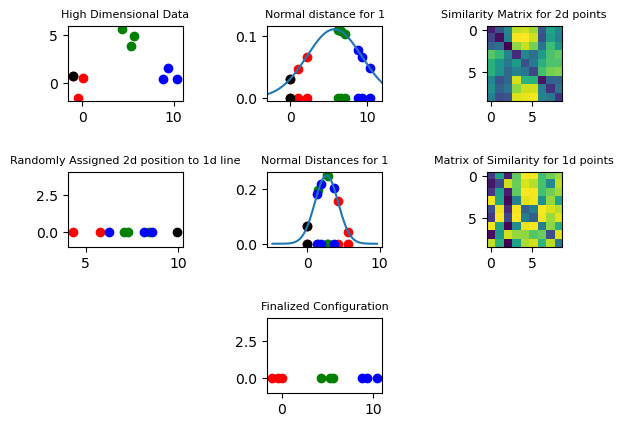

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

# Step 1: Generate the data
np.random.seed(4)
C1 = np.random.randn(3, 2) + np.array([0, 0])
C2 = np.random.randn(3, 2) + np.array([5, 5])
C3 = np.random.randn(3, 2) + np.array([10, 0])

data = np.array([C1, C2, C3])

def dist(a,b):
    d = mt.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
    return d

ds = np.zeros((len(data)**4)).reshape(len(data),len(data),len(data),len(data))
unSS = np.zeros((len(data)**4)).reshape(len(data),len(data),len(data),len(data))
SS = np.zeros((len(data)**4)).reshape(len(data),len(data),len(data),len(data))

for p in range(0, len(data)):
    for q in range(0, len(data)):
        for a in range(0, len(data)):
            for b in range(0, len(data)):
                ds[p][q][a][b] = dist(data[p][q], data[a][b])
                


#now plot the normal curve with this (using 4 stds for x range)

fig, axs = plt.subplots(3,3)
fig.tight_layout(pad=3.0)


def plot2(ax, data):
    ax.set_title('High Dimensional Data', fontsize = 8)
    for i in range(0,len(data)):
        for a in range(0,len(data)):
            if i == 0:
                c = 'r'
            if i == 1:
                c = 'g'
            if i == 2:
                c = 'b'
            ax.scatter(data[i][a][0], data[i][a][1], color = c)
    ax.scatter(data[0][1][0], data[0][1][1], color = 'black')

def plot1(ax, data):
    ax.set_title('Normal distance for 1', fontsize = 8)
    tot = 0
    for i in range(0,len(data)):
        for a in range(0,len(data)):
            tot += ds[0][0][i][a]
    mean = tot/(len(data)**2)
    dev = 0
    for i in range(0,len(data)):
        for a in range(0,len(data)):
            dev += (mean - ds[0][0][i][a])**2
    std = mt.sqrt(dev/(len(data)**2))
    x = np.linspace(-3*std, 6*std, 1000)
    ax.plot(x, (1/(mt.sqrt(2*mt.pi*(std**2))))*(mt.e**(-(((x-mean)**2)/(2*(std**2))))))
    for i in range(0,len(data)):
        for a in range(0,len(data)):
            if i == 0:
                c = 'r'
            if i == 1:
                c = 'g'
            if i == 2:
                c = 'b'
            ax.scatter(ds[0][0][i][a], (1/(mt.sqrt(2*mt.pi*(std**2))))*(mt.e**(-(((ds[0][0][i][a]-mean)**2)/(2*(std**2))))), color = c)
            ax.scatter(ds[0][0][i][a], 0, color = c)
    ax.scatter(ds[0][0][0][0], (1/(mt.sqrt(2*mt.pi*(std**2))))*(mt.e**(-(((ds[0][0][0][0]-mean)**2)/(2*(std**2))))), color = 'black')
    ax.scatter(ds[0][0][0][0], 0, color = 'black')

for p in range(0, len(data)):
    for q in range(0, len(data)): 
        tot = 0
        for i in range(0,len(data)):
            for a in range(0,len(data)):
                tot += ds[p][q][i][a]
        mean = tot/(len(data)**2)
        dev = 0
        for i in range(0,len(data)):
            for a in range(0,len(data)):
                dev += (mean - ds[0][0][i][a])**2
        std = mt.sqrt(dev/(len(data)**2))
        for i in range(0,len(data)):
            for a in range(0,len(data)):
                unSS[p][q][i][a] = (1/(mt.sqrt(2*mt.pi*(std**2))))*(mt.e**(-(((ds[p][q][i][a]-mean)**2)/(2*(std**2)))))
for p in range(0, len(data)):
    for q in range(0, len(data)):
        for i in range(0,len(data)):
            for a in range(0,len(data)):
                SS[p][q][i][a] = unSS[p][q][i][a]/(np.sum(unSS[p][q]))
                
Mx = []
My = []
                
for p in range(0, len(data)):
    for q in range(0, len(data)):
        for i in range(0,len(data)):
            for a in range(0,len(data)):
                Mx.append(SS[p][q][i][a])
        My.append(Mx)
        Mx = []
My = np.array(My)
       
def plot3(ax, My):
    ax.set_title('Similarity Matrix for 2d points', fontsize = 8)
    My[np.where(My < np.max(My)*0.95)] = My[np.where(My < np.max(My)*0.95)]*1.5
    ax.imshow(My)
    
xPos = []
xPos2 = []

for i in range(0,len(data)):
        for a in range(0,len(data)):    
            x = np.random.rand()*10+np.random.rand()*5
            xPos2.append(x)
        xPos.append(xPos2)
        xPos2 = []
    
def plot4(ax, data, xPos):
    ax.set_title('Randomly Assigned 2d position to 1d line', fontsize = 8)
    for i in range(0,len(data)):
        for a in range(0,len(data)):
            if i == 0:
                c = 'r'
                if a == 0:
                    c = 'black'
            if i == 1:
                c = 'g'
            if i == 2:
                c = 'b'
            ax.scatter(xPos[i][a], 0, color = c)
            
def plot5(ax, xPos):
    ax.set_title('Normal Distances for 1', fontsize = 8)
    dist = []
    dist1 = []
    for i in range(0,len(data)):
        for a in range(0,len(data)):
            for p in range(0,len(data)):
                for q in range(0,len(data)):
                    dist1.append(mt.sqrt((xPos[i][a] - xPos[p][q])**2))
            dist.append(dist1)
            dist1 = []
    dist = np.array(dist)
    t = 0
    for i in range(0,len(data)**2):
        t += dist[0][i]
    mean = t/len(data)**2
    var = 0
    for i in range(0,len(data)**2):
        var += (mean - dist[0][i])**2
    dev = var/len(data)**2
    std = mt.sqrt(dev)
    x = np.linspace(-3*std, 6*std, 1000)
    ax.plot(x, (1/(mt.sqrt(2*mt.pi*(std**2))))*(mt.e**(-(((x-mean)**2)/(2*(std**2))))))
    for i in range(0,len(data)**2):
        if i >= 0 and i <3:
            c = 'r'
        if i >= 3 and i <6:
            c = 'g'
        if i >= 6 and i <9:
            c = 'b'
        ax.scatter(dist[0][i], (1/(mt.sqrt(2*mt.pi*(std**2))))*(mt.e**(-(((dist[0][i]-mean)**2)/(2*(std**2))))), color = c)
        ax.scatter(dist[0][i], 0, color = c)
    ax.scatter(dist[0][0], 0, color = 'black')
    ax.scatter(dist[0][0], (1/(mt.sqrt(2*mt.pi*(std**2))))*(mt.e**(-(((dist[0][0]-mean)**2)/(2*(std**2))))), color = 'black')            
dist = []
dist1 = []
for i in range(0,len(data)):
    for a in range(0,len(data)):
        for p in range(0,len(data)):
            for q in range(0,len(data)):
                dist1.append(mt.sqrt((xPos[i][a] - xPos[p][q])**2))
        dist.append(dist1)
        dist1 = []
dist = np.array(dist)
t = 0

unSS2 = []
unSS3 = []
SS2 = []
for a in range(0,len(data)**2):
    t = 0
    for i in range(0,len(data)**2):
        t += dist[a][i]
    mean = t/len(data)**2
    var = 0
    for i in range(0,len(data)**2):
        var += (mean - dist[a][i])**2
    dev = var/len(data)**2
    std = mt.sqrt(dev)
    for i in range(0,len(data)**2):
        unSS2.append((1/(mt.sqrt(2*mt.pi*(std**2))))*(mt.e**(-(((dist[a][i]-mean)**2)/(2*(std**2))))))
    for i in range(0,len(data)**2):
        unSS3.append(unSS2[i]/np.sum(unSS2))
    SS2.append(unSS3)
    unSS2 = []
    unSS3 = [] 
SS2 = np.array(SS2)

def plot6(ax, SS2):
    ax.set_title('Matrix of Similarity for 1d points', fontsize = 8)
    ax.imshow(SS2)
    
def plot7(ax, data):
    ax.set_title('Finalized Configuration', fontsize = 8)
    for i in range(0,len(data)):
        for a in range(0,len(data)):
            if i == 0:
                c = 'r'
            if i == 1:
                c = 'g'
            if i == 2:
                c = 'b'
            ax.scatter(data[i][a][0], 0, color = c)

    
    

plot1(axs[0,1], data)
plot2(axs[0,0], data)
plot3(axs[0,2], My)
plot4(axs[1,0], data, xPos)
plot5(axs[1,1], xPos)
plot6(axs[1,2], SS2)
plot7(axs[2,1], data)
axs[0,1].set_xlim(-3,12)  # Set x-axis limits
axs[1,0].set_ylim(-1,4)  # Set y-axis limits
axs[2, 0].axis('off')
axs[2, 2].axis('off')
axs[2,1].set_ylim(-1,4)  # Set y-axis limits
plt.savefig("fig16.pdf")










In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

# Step 1: Generate the data
np.random.seed(4)
C1 = np.random.randn(3, 2) + np.array([0, 0])
C2 = np.random.randn(3, 2) + np.array([5, 5])
C3 = np.random.randn(3, 2) + np.array([10, 0])

data = np.vstack((C1, C2, C3))

def dist(a, b):
    return np.linalg.norm(a - b)

n_points = data.shape[0]
ds = np.zeros((n_points, n_points))

# Compute the distance matrix
for i in range(n_points):
    for j in range(n_points):
        ds[i][j] = dist(data[i], data[j])


# Calculate the mean and standard deviation for the distances
mean = np.mean(ds)
std = np.std(ds)

# Compute the unnormalized similarity matrix
unSS = np.exp(-((ds - mean) ** 2) / (2 * std ** 2))

# Normalize the similarity matrix
SS = unSS / np.sum(unSS)

# Plotting functions
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(pad=3.0)

def plot2(ax, data):
    ax.set_title('High Dimensional Data', fontsize=8)
    colors = ['r', 'g', 'b']
    for i in range(3):
        ax.scatter(data[i*3:(i+1)*3, 0], data[i*3:(i+1)*3, 1], color=colors[i])
    ax.scatter(data[1, 0], data[1, 1], color='black')

def plot1(ax, data, ds, mean, std):
    ax.set_title('Normal Distribution of Distance for the First Point', fontsize=8)
    x = np.linspace(mean - 3*std, mean + 3*std, 1000)
    y = (1 / (np.sqrt(2 * mt.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)
    ax.plot(x, y)
    for i in range(n_points):
        ax.scatter(ds[0][i], (1 / (np.sqrt(2 * mt.pi) * std)) * np.exp(-0.5 * ((ds[0][i] - mean) / std) ** 2), color='r')
    ax.scatter(ds[0][0], (1 / (np.sqrt(2 * mt.pi) * std)) * np.exp(-0.5 * ((ds[0][0] - mean) / std) ** 2), color='black')

def plot3(ax, SS):
    ax.set_title('Similarity Matrix', fontsize=8)
    im = ax.imshow(SS, cmap='hot', interpolation='nearest')
    plt.colorbar(im, ax=ax)

plot1(axs[0, 1], data, ds, mean, std)
plot2(axs[0, 0], data)
plot3(axs[1, 0], SS)

axs[0, 1].set_xlim(mean - 3*std, mean + 3*std)

plt.show()
